In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap

In [3]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv', delimiter = ',')
Harris_iii = pd.read_csv('Data_Folder/HarrisPartIII.csv', delimiter = ',')
VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv', delimiter = ',')
Krause21 = pd.read_csv('Data_Folder/Krause21.csv', delimiter = ',')

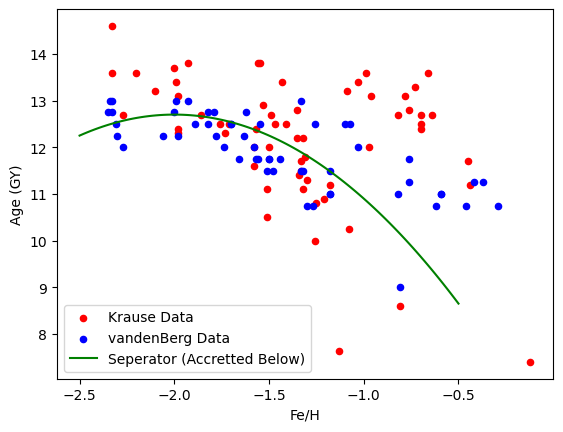

In [4]:
## Extra Plot Section: Removing titles/changing font size

## Creating FeH / Age plot for Krause and vandenBerg data

#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])
#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age (GY)')


plt.show()

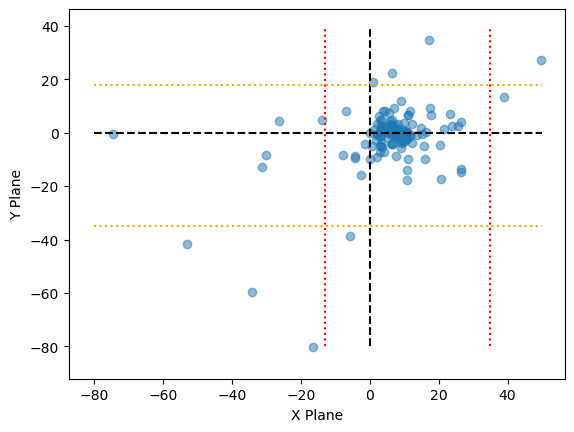

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [9]:
x_min = 35
x_max = -13
y_min = 18
y_max = -35
z_min = 11
z_max = -50

# This block of code plots the Harris Part I in the X, Y axis
# The scatterplots include a cursor meaning we can pick out the accreted globular clusters off the scatterplot

# First we need to import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt


# Then, we need to define the figure and axis or else the cursor function does not work:
fig, ax = plt.subplots()

# Now we can plot Harris I in X, Y and add the cursor
ax.scatter(Harris_i['X'], Harris_i['Y'], alpha=0.5)
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('X Plane')
plt.ylabel('Y Plane')

plt.vlines(0, -80,40,linestyles='dashed', colors='black')
plt.hlines(0, -80, 50, colors= 'black', linestyles='dashed')

#Show x boundary and y boundaries
plt.vlines(x_min, -80,40,linestyles='dotted', colors='red')
plt.vlines(x_max, -80,40,linestyles='dotted', colors='red')

plt.hlines(y_max, -80, 50, colors= 'orange', linestyles='dotted')
plt.hlines(y_min, -80, 50, colors= 'orange', linestyles='dotted')



plt.show()
plt.ion

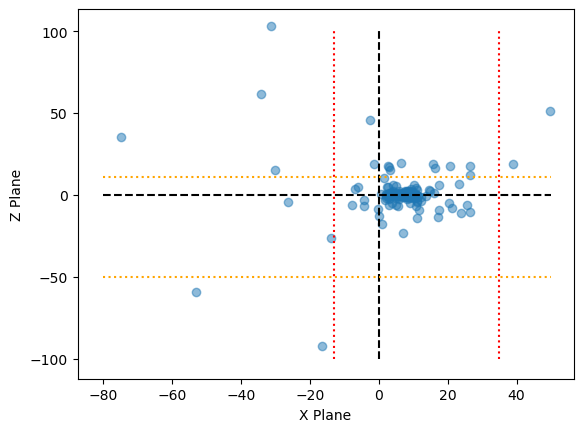

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [12]:
# Harris Part I in the X, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in X, Z
ax.scatter(Harris_i['X'], Harris_i['Z'], alpha = 0.5)

cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('X Plane')
plt.ylabel('Z Plane')

plt.vlines(0, -100,100,linestyles='dashed', colors='black')
plt.hlines(0, -80, 50, colors= 'black', linestyles='dashed')

#X and Z boundaries
plt.vlines(x_min, -100,100,linestyles='dotted', colors='red')
plt.vlines(x_max, -100,100,linestyles='dotted', colors='red')

plt.hlines(z_max, -80, 50, colors= 'orange', linestyles='dotted')
plt.hlines(z_min, -80, 50, colors= 'orange', linestyles='dotted')

plt.show()
plt.ion

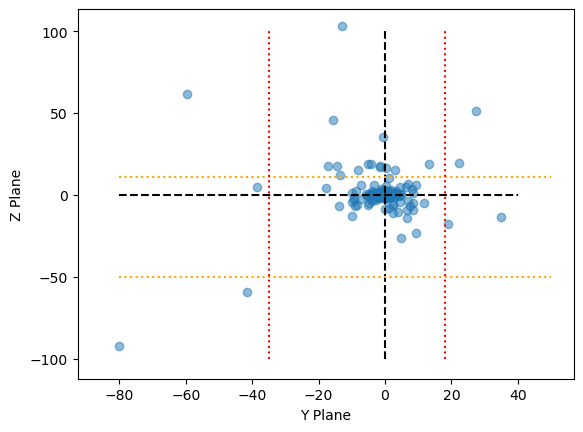

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [16]:
# Harris Part I in the Y, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in Y, Z
ax.scatter(Harris_i['Y'], Harris_i['Z'], alpha = 0.5)

cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('Y Plane')
plt.ylabel('Z Plane')

plt.vlines(0, -100,100,linestyles='dashed', colors='black')
plt.hlines(0, -80, 40, colors= 'black', linestyles='dashed')

plt.hlines(z_max, -80, 50, colors= 'orange', linestyles='dotted')
plt.hlines(z_min, -80, 50, colors= 'orange', linestyles='dotted')

plt.vlines(y_max, -100, 100, colors= 'red', linestyles='dotted')
plt.vlines(y_min, -100, 100, colors= 'red', linestyles='dotted')


plt.show()
plt.ion

## Checking Catalogue Completeness

In [ ]:
Harris_i['ID'], Harris_iii['ID'] 

Harris_i_iii_IDcombo = pd.DataFrame([Harris_i['ID'], Harris_iii['ID']])
Harris_i_iii_IDcombo.T

#Checking catalogued galaxies from Harris i and iii -> They are the same

,ID,ID
0,NGC 104,NGC 104
1,NGC 288,NGC 288
2,NGC 362,NGC 362
3,Whiting 1,Whiting 1
4,NGC 1261,NGC 1261
...,...,...
152,NGC 7089,NGC 7089
153,NGC 7099,NGC 7099
154,Pal 12,Pal 12
155,Pal 13,Pal 13


In [ ]:
Harris_i_Krause_IDcombo = pd.DataFrame([Harris_i['ID'], Krause21['Object']])
Harris_i_Krause_IDcombo.T
#Checking catalogued galaxies from Harris 1 and Krause -> Not the same, Krause much less complete

,ID,Object
0,NGC 104,NGC104
1,NGC 288,NGC288
2,NGC 362,NGC362
3,Whiting 1,NGC1261
4,NGC 1261,NGC1851
...,...,...
152,NGC 7089,NaN
153,NGC 7099,NaN
154,Pal 12,NaN
155,Pal 13,NaN


In [ ]:
Harris_i_vandenBerg_IDcombo = pd.DataFrame([Harris_i['ID'] ,VandenBerg['#NGC']])
Harris_i_vandenBerg_IDcombo.T
#Checking catalogued galaxies from Harris 1 and vandenBerg -> Not the same, VandenBerg less complete

,ID,#NGC
0,NGC 104,104
1,NGC 288,288
2,NGC 362,362
3,Whiting 1,1261
4,NGC 1261,1851
...,...,...
152,NGC 7089,NaN
153,NGC 7099,NaN
154,Pal 12,NaN
155,Pal 13,NaN


In [ ]:
Krause_VandenBerg_IDcombo = pd.DataFrame([VandenBerg['#NGC'], Krause21['Object']])
Krause_VandenBerg_IDcombo.T
#Checking catalogued galaxies of krause and vandenberg -> seem aligned but vandenberg is shorter, and has different notation

,#NGC,Object
0,104,NGC104
1,288,NGC288
2,362,NGC362
3,1261,NGC1261
4,1851,NGC1851
...,...,...
56,NaN,NGC7089
57,NaN,NGC7099
58,NaN,Ruprecht106
59,NaN,Terzan7


Results of data checking:

Harris i and iii are aligned, and krause/vandenberg are aligned. Use vandenberg+krause together and both harris dataframes together when multiple needed if you can get away with it for ease of use.

In [19]:
#Combine harris i and iii into 1 dataframe

#exclude id column from harris iii
Harris_iii_IDnone = Harris_iii.T.drop('ID')

#Combine Dataframes
Harris_i_iii = Harris_i.join(Harris_iii_IDnone.T)
Harris_i_iii

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,NGC 104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,...,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,...,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,...,214.0,6.4,0.3,1.76,0.18,0.82,14.8,4.74,7.76,8.93
3,Whiting 1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,...,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,...,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,M 2,21:33:27.02,-00:49:23.7,53.37,-35.77,11.5,10.4,5.6,7.5,...,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.0,8.48,9.4
153,NGC 7099,M 30,21:40:22.12,-23:10:47.5,27.18,-46.84,8.1,7.1,4.9,2.5,...,-179.6,5.5,0.4,2.5,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal 12,NaN,21:46:38.84,-21:15:09.4,30.51,-47.68,19.0,15.8,11.0,6.5,...,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal 13,NaN,23:06:44.44,+12:46:19.2,87.10,-42.70,26.0,26.9,1.0,19.1,...,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


## Dynamical Properties

In [20]:
Harris_i_iii.keys()

Index(['ID', 'Name', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z',
       'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h', 'mu_V',
       'rho_0', 'lg_tc', 'lg_th'],
      dtype='object')

Text(0.5, 0, 'Velocity of Cluster')

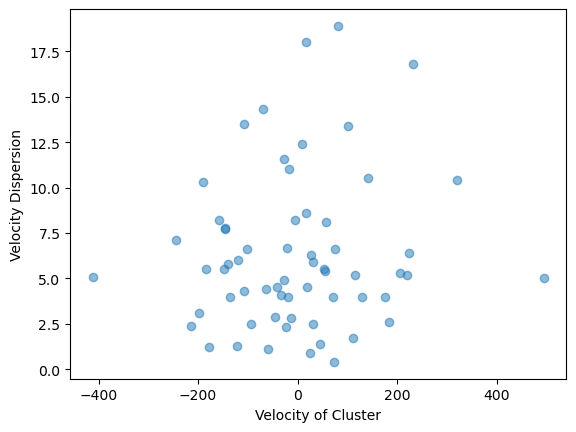

In [21]:
plt.scatter(Harris_i_iii['v_r'], Harris_i_iii['sig_v'], alpha = 0.5)
plt.ylabel('Velocity Dispersion')
plt.xlabel('Velocity of Cluster')

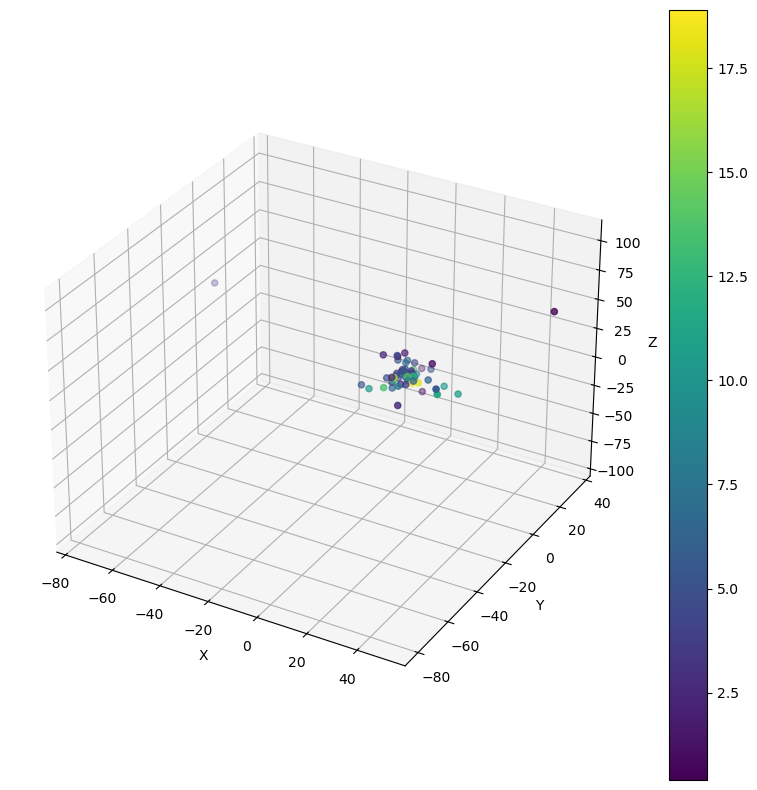

In [23]:
#This plot builds off of Ella's 3d location plot, colored by velocity dispersion
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

p = ax.scatter(Harris_i_iii['X'],Harris_i_iii['Y'],Harris_i_iii['Z'], c= Harris_i_iii['sig_v'])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
#plt.title('Spacial map of Globular Clusters colored by Velocity Dispersion')
plt.colorbar(p)

Text(0.5, 0, 'Galactic Radius (kpc)')

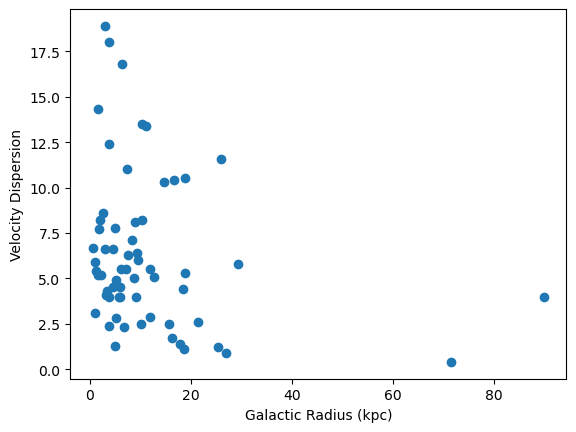

In [ ]:
plt.scatter(Harris_i_iii['R_gc'], Harris_i_iii['sig_v'])

plt.ylabel('Velocity Dispersion')
plt.xlabel('Galactic Radius (kpc)')

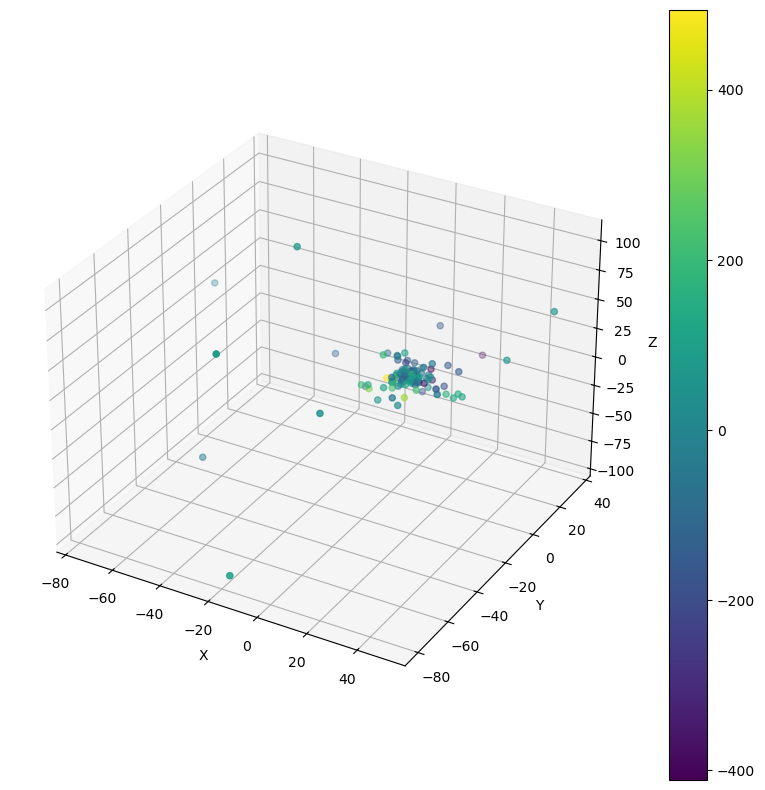

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

p = ax.scatter(Harris_i_iii['X'],Harris_i_iii['Y'],Harris_i_iii['Z'], c= Harris_i_iii['v_r'])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
#plt.title('Spacial map of Globular Clusters colored by Radial Velocity')
plt.colorbar(p)

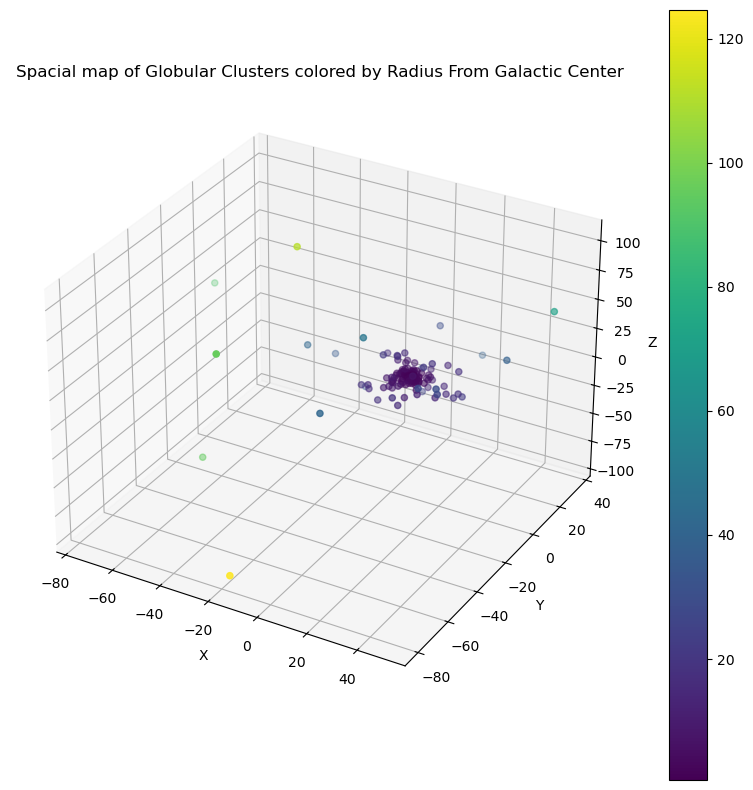

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

p = ax.scatter(Harris_i_iii['X'],Harris_i_iii['Y'],Harris_i_iii['Z'], c= Harris_i_iii['R_gc'])
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
plt.title('Spacial map of Globular Clusters colored by Radius From Galactic Center')
plt.colorbar(p)

In [24]:
High_sigv = np.abs(Harris_i_iii['sig_v'])[Harris_i_iii['sig_v']>=15]
Low_sigv = np.abs(Harris_i_iii['sig_v'])[Harris_i_iii['sig_v']<=5]

Belokurov - Velocity vs metallicity shows accreted vs in sity
    - Harris data does not include Fe/H, so this cannot be shown directly here

In [25]:
High_sigvdf = Harris_i_iii[Harris_i_iii['sig_v']>=15]
Low_sigvdf = Harris_i_iii['sig_v'][Harris_i_iii['sig_v']<=5]

# Redo of Correlations
They disappeared

In [ ]:

pd.DataFrame(Harris_i_iii['sig_v']).corrwith(Harris_i_iii['R_gc']), pd.DataFrame(Harris_i_iii['R_gc']).corrwith(Harris_i_iii['v_r'])

(sig_v   -0.239458
 dtype: float64,
 R_gc    0.04144
 dtype: float64)